# 準備

In [1]:
!pip install fastf1


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import fastf1
import fastf1.plotting
from matplotlib import pyplot as plt

np.set_printoptions(suppress=True)

fastf1.Cache.enable_cache('fastf1/cache')
fastf1.plotting.setup_mpl()

## fastf1からデータを取得
2022年のMonzaのレースデータを使ってみる

In [3]:
session = fastf1.get_session(2022, 'Monza', 'R')
session.load()

core           INFO 	Loading data for Italian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
session     WARNING 	Request for URL https://ergast.com/api/f1/2022/16/results.json failed; using cached response
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/usr/local/lib/python3.8/site-packages/urllib3/util/connection.py", line 95, in create_connection
    raise err
  File "/usr/local/lib/python3.8/site-packages/urllib3/util/connection.py", line 85, in create_connection
    sock.connect(sa)
TimeoutError: [Errno 110] Connection timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/urllib3/connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "/usr/local/lib/python3.8/site-packages/url

In [4]:
# ルクレールのレースペースデータを取得
lec_laps = session.laps.pick_driver('LEC')
lec_laps['LapTimeSec'] = lec_laps['LapTime'].apply(lambda x: x.seconds + x.microseconds / 1000000)
compounds = {}
for i, compound in enumerate(np.unique(lec_laps['Compound'].values)):
    compounds[compound] = i
lec_laps['CompoundSeq'] = lec_laps['Compound'].apply(lambda x: compounds[x])

lec_laps['TyreResetLapNumber'] = lec_laps['LapNumber'] - lec_laps['TyreLife']
lec_laps

/tmp/ipykernel_109/1330420464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lec_laps['LapTimeSec'] = lec_laps['LapTime'].apply(lambda x: x.seconds + x.microseconds / 1000000)
/tmp/ipykernel_109/1330420464.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lec_laps['CompoundSeq'] = lec_laps['Compound'].apply(lambda x: compounds[x])
/tmp/ipykernel_109/1330420464.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,LapTimeSec,CompoundSeq,TyreResetLapNumber
53,0 days 01:03:56.501000,16,NaT,1,0 days 00:24:32.238000,NaT,NaT,0 days 00:00:29.537000,0 days 00:00:28.715000,NaT,...,1,0 days 01:02:28.137000,Ferrari,LEC,1,False,2022-09-11 13:03:28.378,NaN,1,0.0
54,0 days 01:05:23.036000,16,0 days 00:01:26.535000,2,NaT,NaT,0 days 00:00:28.687000,0 days 00:00:29.260000,0 days 00:00:28.588000,0 days 01:04:25.188000,...,1,0 days 01:03:56.501000,Ferrari,LEC,1,True,2022-09-11 13:04:56.742,86.535,1,0.0
55,0 days 01:06:49.388000,16,0 days 00:01:26.352000,3,NaT,NaT,0 days 00:00:28.359000,0 days 00:00:29.434000,0 days 00:00:28.559000,0 days 01:05:51.395000,...,1,0 days 01:05:23.036000,Ferrari,LEC,1,True,2022-09-11 13:06:23.277,86.352,1,0.0
56,0 days 01:08:15.190000,16,0 days 00:01:25.802000,4,NaT,NaT,0 days 00:00:28.202000,0 days 00:00:29.144000,0 days 00:00:28.456000,0 days 01:07:17.590000,...,1,0 days 01:06:49.388000,Ferrari,LEC,1,True,2022-09-11 13:07:49.629,85.802,1,0.0
57,0 days 01:09:41.092000,16,0 days 00:01:25.902000,5,NaT,NaT,0 days 00:00:28.140000,0 days 00:00:29.351000,0 days 00:00:28.411000,0 days 01:08:43.330000,...,1,0 days 01:08:15.190000,Ferrari,LEC,1,True,2022-09-11 13:09:15.431,85.902,1,0.0
58,0 days 01:11:06.651000,16,0 days 00:01:25.559000,6,NaT,NaT,0 days 00:00:28.042000,0 days 00:00:29.215000,0 days 00:00:28.302000,0 days 01:10:09.134000,...,1,0 days 01:09:41.092000,Ferrari,LEC,1,True,2022-09-11 13:10:41.333,85.559,1,0.0
59,0 days 01:12:32.118000,16,0 days 00:01:25.467000,7,NaT,NaT,0 days 00:00:27.946000,0 days 00:00:29.207000,0 days 00:00:28.314000,0 days 01:11:34.597000,...,1,0 days 01:11:06.651000,Ferrari,LEC,1,True,2022-09-11 13:12:06.892,85.467,1,0.0
60,0 days 01:13:57.902000,16,0 days 00:01:25.784000,8,NaT,NaT,0 days 00:00:28.018000,0 days 00:00:29.412000,0 days 00:00:28.354000,0 days 01:13:00.136000,...,1,0 days 01:12:32.118000,Ferrari,LEC,1,True,2022-09-11 13:13:32.359,85.784,1,0.0
61,0 days 01:15:23.994000,16,0 days 00:01:26.092000,9,NaT,NaT,0 days 00:00:28.075000,0 days 00:00:29.516000,0 days 00:00:28.501000,0 days 01:14:25.977000,...,1,0 days 01:13:57.902000,Ferrari,LEC,1,True,2022-09-11 13:14:58.143,86.092,1,0.0
62,0 days 01:16:50.260000,16,0 days 00:01:26.266000,10,NaT,NaT,0 days 00:00:28.171000,0 days 00:00:29.509000,0 days 00:00:28.586000,0 days 01:15:52.165000,...,1,0 days 01:15:23.994000,Ferrari,LEC,1,True,2022-09-11 13:16:24.235,86.266,1,0.0


### 可視化

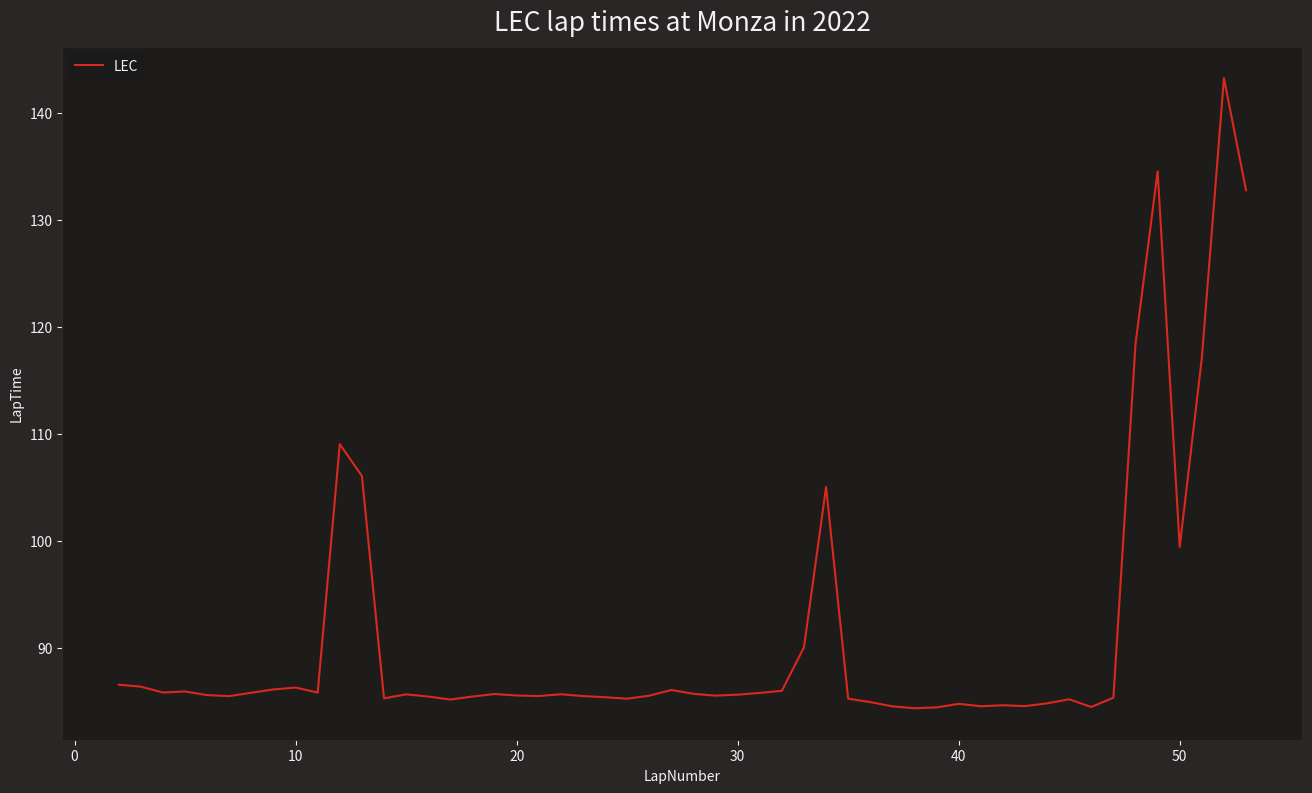

In [5]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

ax.plot(lec_laps['LapNumber'], lec_laps['LapTimeSec'], label='LEC', color='#da291c')
ax.set_xlabel('LapNumber')
ax.set_ylabel('LapTime')
ax.set_title('LEC lap times at Monza in 2022')
ax.legend()
plt.show()

12, 33周目付近のタイムが上がっているのはピットストップによるもの。47周目付近から最後にかけてタイムが上がっているのは、イエローフラッグ、セーフティーカーの導入によるものです。

ピットストップ、イエローフラッグ、セーフティーカーなどのないクリアラップだけを抜き出して可視化してみます。

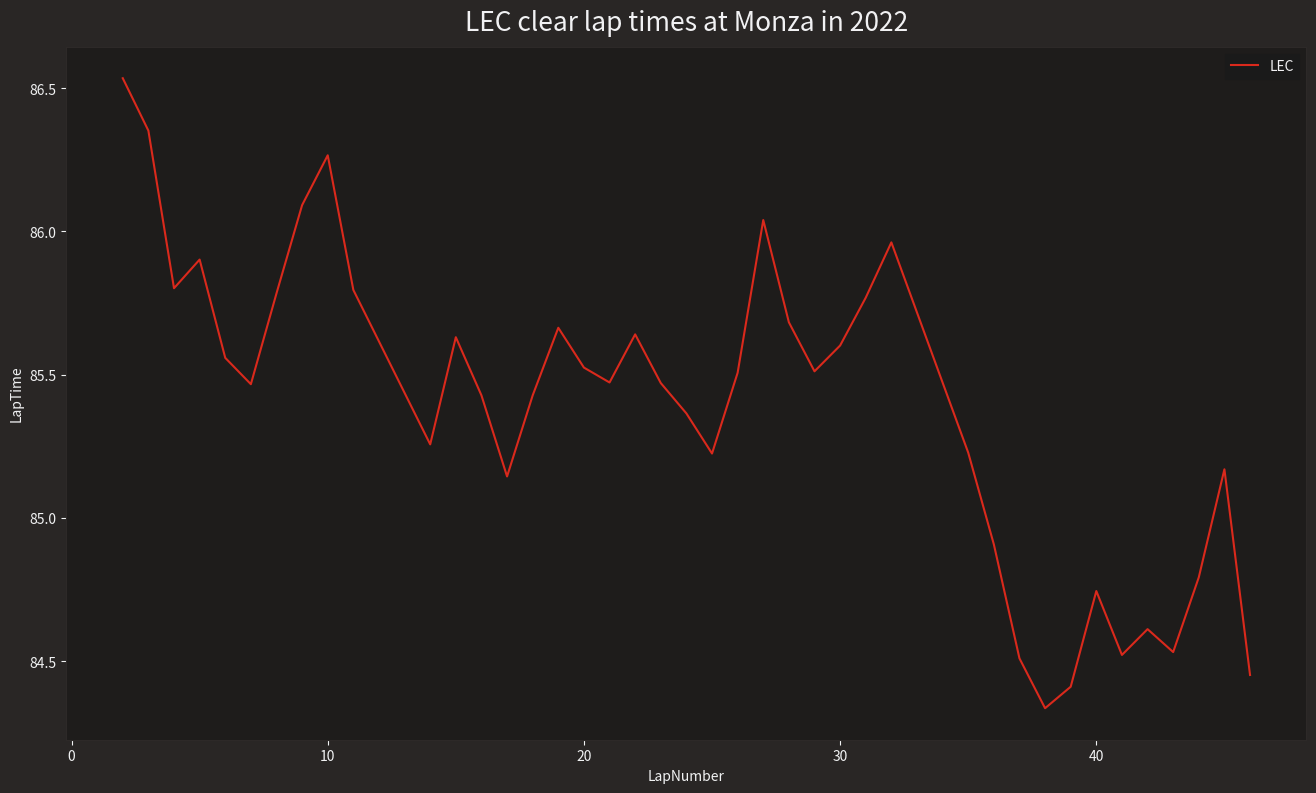

In [6]:
lec_clear_laps = lec_laps.query('TrackStatus == "1" and PitOutTime == "NaT" and PitInTime == "NaT"')

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

ax.plot(lec_clear_laps['LapNumber'], lec_clear_laps['LapTimeSec'], label='LEC', color='#da291c')
ax.set_xlabel('LapNumber')
ax.set_ylabel('LapTime')
ax.set_title('LEC clear lap times at Monza in 2022')
ax.legend()
plt.show()

仮にピットストップが不要で、イエローフラッグ、セーフティーカーなどの要因がなかった場合、各ラップどのくらいのタイムで走れた可能性があるのかを回帰を使って予測してみます。

# 単回帰分析
単回帰分析は一つの変数を使って、目的変数を予測します。  
ここでは、周回数を使ってラップタイムを予測してみます。

In [7]:
x_train = lec_clear_laps['LapNumber']
x_mean = x_train.mean()

y_train = lec_clear_laps['LapTimeSec']
y_mean = y_train.mean()

In [8]:
y_mean

85.39273170731707

In [9]:
# 回帰係数を求める
a = ((x_train - x_mean) * (y_train - y_mean)).sum() / ((x_train - x_mean) * (x_train - x_mean)).sum()
a

-0.03264720985496163

In [10]:
b = y_mean - a * x_mean
b

86.17944983748053

In [11]:
x_test = lec_laps['LapNumber'].values
predicted_y = a * x_test + b
predicted_y

array([86.14680263, 86.11415542, 86.08150821, 86.048861  , 86.01621379,
       85.98356658, 85.95091937, 85.91827216, 85.88562495, 85.85297774,
       85.82033053, 85.78768332, 85.75503611, 85.7223889 , 85.68974169,
       85.65709448, 85.62444727, 85.59180006, 85.55915285, 85.52650564,
       85.49385843, 85.46121122, 85.42856401, 85.3959168 , 85.36326959,
       85.33062238, 85.29797517, 85.26532796, 85.23268075, 85.20003354,
       85.16738633, 85.13473912, 85.10209191, 85.0694447 , 85.03679749,
       85.00415028, 84.97150307, 84.93885586, 84.90620865, 84.87356144,
       84.84091423, 84.80826702, 84.77561981, 84.7429726 , 84.71032539,
       84.67767818, 84.64503097, 84.61238376, 84.57973655, 84.54708934,
       84.51444213, 84.48179493, 84.44914772])

In [12]:
(((a * lec_clear_laps['LapNumber'] + b) - lec_clear_laps['LapTimeSec'])**2).sum()

4.955696802436465

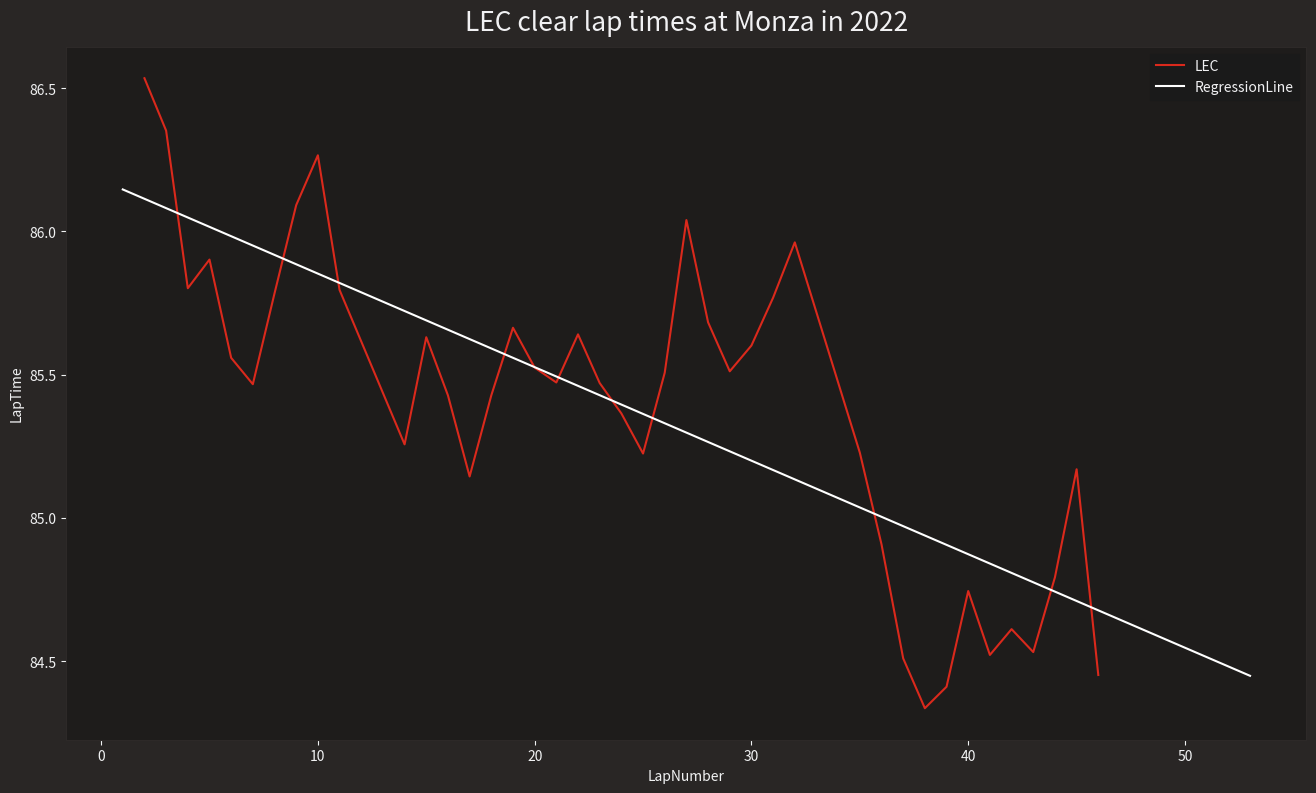

In [13]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

ax.plot(lec_clear_laps['LapNumber'], lec_clear_laps['LapTimeSec'], label='LEC', color='#da291c')
ax.plot(lec_laps['LapNumber'], predicted_y, label='RegressionLine', color='#FFFFFF')
ax.set_xlabel('LapNumber')
ax.set_ylabel('LapTime')
ax.set_title('LEC clear lap times at Monza in 2022')
ax.legend()
plt.show()

赤線は実際のラップタイム。白線は周回数とラップタイムの関係を表した線です。  
右に行くほど下がっている = 周回数を重ねるほどラップタイムが短くなることを表しています。  
これは実際に、周回数を重ねることで車に搭載されている燃料が少なくなり車の重量が軽くなったり、コースの路面にタイヤのラバーがのることでより早く走れる状況になることから感覚と一致しています。

# 重回帰分析
単回帰分析は一つの変数を使って、目的変数を予測しました。  
しかし、実際のF1では他のさまざまな要因でラップタイムが変わってきます。 　
今回は周回数の他、履いているタイヤの種類とそのタイヤを使った周回数を元にラップタイムを予測してみます。

## スケーリング
このままの値でも予測が可能ですが、今回はどの変数（周回数、タイヤの種類、タイヤを使った周回数）がどのくらいラップタイムの良し悪しに影響するのかを知るために、各変数のスケールを揃えておきます。

In [14]:
x_train = lec_clear_laps[['LapNumber', 'TyreLife', 'CompoundSeq']]
scaled_x_train = np.insert(((x_train - x_train.mean()) / x_train.std()).values, 3, 1, axis=1)
scaled_x_train

array([[-1.65354293, -1.40369055,  0.91791724,  1.        ],
       [-1.57871373, -1.19960788,  0.91791724,  1.        ],
       [-1.50388452, -0.99552522,  0.91791724,  1.        ],
       [-1.42905532, -0.79144255,  0.91791724,  1.        ],
       [-1.35422611, -0.58735988,  0.91791724,  1.        ],
       [-1.27939691, -0.38327721,  0.91791724,  1.        ],
       [-1.2045677 , -0.17919454,  0.91791724,  1.        ],
       [-1.12973849,  0.02488813,  0.91791724,  1.        ],
       [-1.05490929,  0.2289708 ,  0.91791724,  1.        ],
       [-0.98008008,  0.43305347,  0.91791724,  1.        ],
       [-0.75559247, -1.40369055, -1.06285154,  1.        ],
       [-0.68076326, -1.19960788, -1.06285154,  1.        ],
       [-0.60593406, -0.99552522, -1.06285154,  1.        ],
       [-0.53110485, -0.79144255, -1.06285154,  1.        ],
       [-0.45627564, -0.58735988, -1.06285154,  1.        ],
       [-0.38144644, -0.38327721, -1.06285154,  1.        ],
       [-0.30661723, -0.

In [15]:
y_train

54    86.535
55    86.352
56    85.802
57    85.902
58    85.559
59    85.467
60    85.784
61    86.092
62    86.266
63    85.796
66    85.257
67    85.631
68    85.428
69    85.145
70    85.428
71    85.664
72    85.525
73    85.473
74    85.641
75    85.471
76    85.365
77    85.225
78    85.507
79    86.040
80    85.683
81    85.512
82    85.602
83    85.769
84    85.962
87    85.228
88    84.908
89    84.510
90    84.336
91    84.411
92    84.745
93    84.522
94    84.612
95    84.532
96    84.793
97    85.170
98    84.452
Name: LapTimeSec, dtype: float64

In [16]:
w = np.dot(np.linalg.inv(np.dot(scaled_x_train.T, scaled_x_train)), np.dot(scaled_x_train.T, y_train))
w

array([-0.5187533 ,  0.2412022 , -0.00356473, 85.39273171])

In [41]:
((np.dot(scaled_x_train, w) - np.array(y_train.values))**2).sum()

2.87203208595776

In [18]:
x_test = lec_laps[['LapNumber', 'TyreLife', 'CompoundSeq']]
scaled_x_test = np.insert(((x_test - x_train.mean()) / x_train.std()).values, 3, 1, axis=1)

predicted_y = np.dot(scaled_x_test, w)
predicted_y

array([85.8982599 , 85.90866719, 85.91907448, 85.92948177, 85.93988906,
       85.95029635, 85.96070365, 85.97111094, 85.98151823, 85.99192552,
       86.00233281, 86.0127401 , 85.43950604, 85.44991333, 85.46032062,
       85.47072791, 85.4811352 , 85.49154249, 85.50194978, 85.51235707,
       85.52276437, 85.53317166, 85.54357895, 85.55398624, 85.56439353,
       85.57480082, 85.58520811, 85.5956154 , 85.60602269, 85.61642998,
       85.62683728, 85.63724457, 85.64765186, 84.61726928, 84.62767657,
       84.63808386, 84.64849115, 84.65889844, 84.66930573, 84.67971302,
       84.69012031, 84.7005276 , 84.71093489, 84.72134219, 84.73174948,
       84.74215677, 84.75256406, 84.76297135, 84.18267638, 84.19308367,
       84.20349096, 84.21389825, 84.22430554])

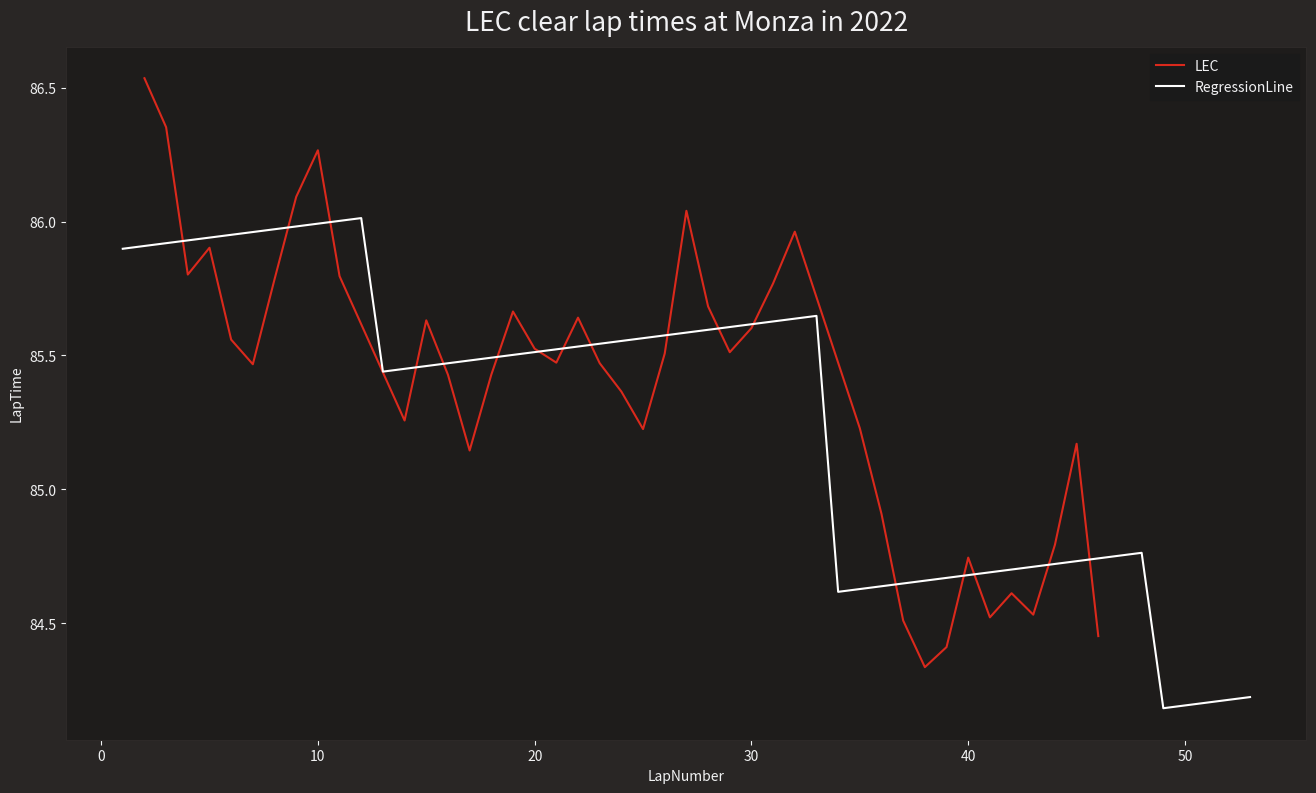

In [19]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

ax.plot(lec_clear_laps['LapNumber'], lec_clear_laps['LapTimeSec'], label='LEC', color='#da291c')
ax.plot(lec_laps['LapNumber'], predicted_y, label='RegressionLine', color='#FFFFFF')
ax.set_xlabel('LapNumber')
ax.set_ylabel('LapTime')
ax.set_title('LEC clear lap times at Monza in 2022')
ax.legend()
plt.show()

赤線は実際のラップタイム。白線は周回数とラップタイムの関係を表した線です。  
タイヤの周回数が増えるにつれてラップタイムは微増し、タイヤを替えタイヤの周回数が0になると一気にラップタイムがよくなる傾向が見えました。  
また、タイヤを12周目付近にSoftからMeduim、さらに33周目付近でMediumからSoftに変更した際には12周目のラップタイムの下がり幅より33周目の下がり幅の方が大きいことがみてとれます。

つまり、こんなことがわかります。
- 全体の周回数を重ねることでラップタイムは良くなる
- タイヤは新しい方がラップタイムはよくなる
- Mediumタイヤよりも、Softタイヤの方がラップタイムは良くなる

ここで重回帰分析のパラメータを見てみましょう。

In [20]:
w

array([-0.5187533 ,  0.2412022 , -0.00356473, 85.39273171])

In [46]:
[predicted_y[11], predicted_y[12], predicted_y[32], predicted_y[33], predicted_y[47], predicted_y[48], predicted_y[49], predicted_y[50],  predicted_y[51],  predicted_y[52]]

[86.01274010056568,
 85.43950603724905,
 85.64765185748787,
 84.61726927508907,
 84.76297134925626,
 84.18267637563572,
 84.19308366664767,
 84.2034909576596,
 84.21389824867154,
 84.22430553968348]

左から
- 周回数
- タイヤの利用周回数
- タイヤの種類

の係数です。

- 周回数の係数は負の値なので、周回数が伸びるほどラップタイムはさがる
- タイヤの利用周回数の係数は正の値なので、利用周回数が伸びるほどラップタイムは上がる
- タイヤの種類は負の値かつSoft=1, Medium=0なので、Softの方がラップタイムはさがる

さらに周回数の係数の絶対数が一番大きいため、この3つの変数では周回数がラップタイムに与える影響が一番大きいということがわかります。

In [21]:
# x_train = lec_clear_laps[['TyreResetLapNumber', 'TyreLife', 'CompoundSeq']]
# scaled_x_train = np.insert(((x_train - x_train.mean()) / x_train.std()).values, 3, 1, axis=1)

# w = np.dot(np.linalg.inv(np.dot(scaled_x_train.T, scaled_x_train)), np.dot(scaled_x_train.T, y_train))


# x_test = lec_laps[['TyreResetLapNumber', 'TyreLife', 'CompoundSeq']]
# scaled_x_test = np.insert(((x_test - x_train.mean()) / x_train.std()).values, 3, 1, axis=1)

# predicted_y = np.dot(scaled_x_test, w)

# fig = plt.figure(figsize=(16, 9))
# ax = fig.add_subplot(1, 1, 1)

# ax.plot(lec_clear_laps['LapNumber'], lec_clear_laps['LapTimeSec'], label='LEC', color='#da291c')
# ax.plot(lec_laps['LapNumber'], predicted_y, label='RegressionLine', color='#FFFFFF')
# ax.set_xlabel('LapNumber')
# ax.set_ylabel('LapTime')
# ax.set_title('LEC clear lap times at Monza in 2022')
# ax.legend()
# plt.show()